# Alliance Auth Community App Usage

This journal shows usage of community apps based on telemetry data from Google Analytics.

In [156]:
"""imports & constants"""

import pandas as pd
import datetime as dt

In [157]:
"""load data"""
df = pd.read_csv("apps_usage.csv", skiprows=8, header=None, names=["name", "count"])
df

name  count
0             addons    267
1       allianceauth    267
2                esi    267
3          eveonline    267
4          existence    267
..               ...    ...
198   tnnt_templates      1
199      voicesofwar      1
200   wizardindustry      1
201       wizardmisc      1
202  wizardskillfarm      1

[203 rows x 2 columns]

In [158]:
"""Amend and filter data"""
min_count = 20
excluded_apps = {
    "addons",
    "admin",
    "allianceauth",
    "analytics",
    "auth",
    "authentication",
    "bootstrapform",
    "contenttypes",
    "corpstats",
    "corputils",
    "custom_css",
    "darkly",
    "discord",
    "esi",
    "eve_autogroups",
    "eveonline",
    "existence",
    "flatly",
    "frameworks",
    "groupmanagement",
    "hrapplications",
    "humanize",
    "materia",
    "menu",
    "messages",
    "mumble",
    "navhelper",
    "notifications",
    "optimer,"
    "permissions_tool",
    "services",
    "sessions",
    "sortedm2m",
    "srp",
    "staticfiles",
    "teamspeak3",
    "theme",
    "timerboard",
    "tokens",
    "users",
    "django_bootstrap5",
    "django_celery_beat",
    "django_celery_results",
    "django_ckeditor_5",
    "solo",
}
total = df.loc[df["name"] == "allianceauth", "count"].values[0]
df2 = df.query("count >= @min_count and name not in @excluded_apps")
df2 = df2.assign(share = df2["count"] / total * 100)
df2

name  count      share
12               eveuniverse    238  89.138577
14                structures    169  63.295880
16                  fittings    136  50.936330
17               memberaudit    133  49.812734
21           package_monitor    112  41.947566
22              securegroups    106  39.700375
23                 corptools    105  39.325843
24                moonmining     97  36.329588
25            buybackprogram     95  35.580524
26          permissions_tool     91  34.082397
27               taskmonitor     90  33.707865
28               killtracker     88  32.958801
29           structuretimers     88  32.958801
30                     aasrp     80  29.962547
31              aadiscordbot     75  28.089888
40                   freight     72  26.966292
50                 framework     71  26.591760
51                 timezones     70  26.217228
52                fleetpings     67  25.093633
54                blueprints     63  23.595506
55                   optimer     63  23.595506
56                 blacklist     60  22.471910
59  memberaudit_securegroups     54  20.224719
60                  charlink     53  19.850187
61             discordnotify     51  19.101124
62                opcalendar     50  18.726592
64                      afat     48  17.977528
65               miningtaxes     48  17.977528
66                 esistatus     47  17.602996
67               signalpings     47  17.602996
68                  invoices     46  17.228464
70                simplewiki     41  15.355805
71           celeryanalytics     40  14.981273
72     fleetactivitytracking     36  13.483146
74             marketmanager     34  12.734082
75                 moonstuff     33  12.359551
76                inactivity     31  11.610487
77                     moons     30  11.235955
79               groupassign     25   9.363296
80             aa_intel_tool     24   8.988764
81                  sovtimer     22   8.239700
82                       top     21   7.865169

<Axes: title={'center': 'AA community app usage, % share by installation (N=267, y>=20)'}, ylabel='name'>

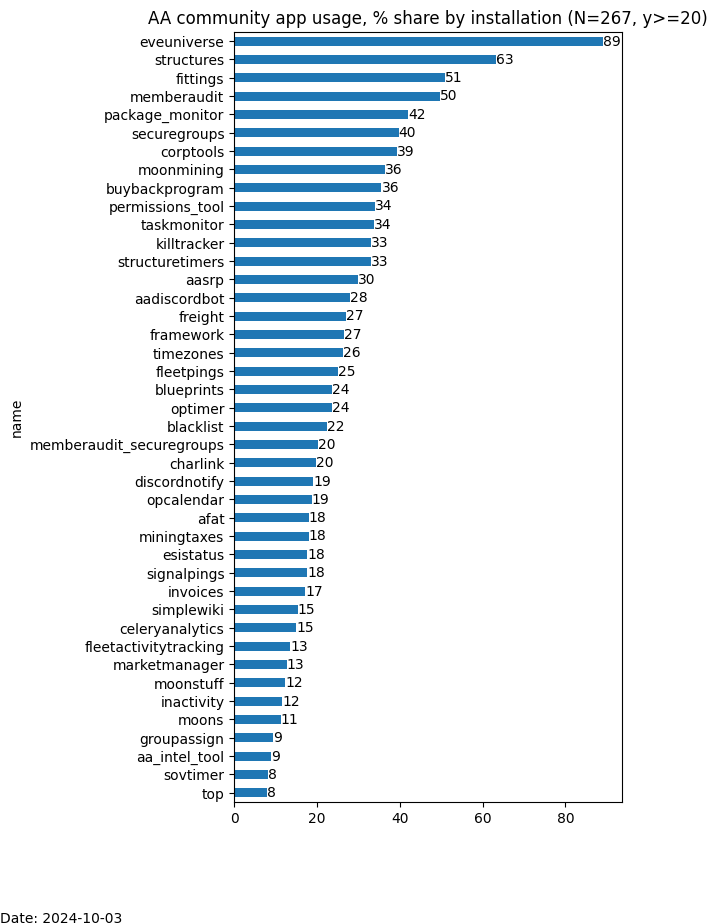

In [187]:
"""plot data"""

ax = df2.plot.barh(
    x="name",
    y="share",
    legend=None,
    figsize=(5, 10),
    title=f"AA community app usage, % share by installation (N={total}, y>={min_count})",
)
ax.bar_label(ax.containers[0], fmt="%.0f")
ax.invert_yaxis()
ax.text(0, 0, f"Date: {dt.datetime.now().date()}", transform=ax.transLimits)
ax